In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import vnstock3 as vnstock
from streamlit import columns

#Đọc dữ liệu
data = pd.read_csv('data.csv')

In [3]:
#Tính toán lợi nhuận hàng ngày
data['ACB ret'] = data['ACB'].pct_change()
data['FPT ret'] = data['FPT'].pct_change()
data['HPG ret'] = data['HPG'].pct_change()

print(data.head())

      Dates       ACB        FPT        HPG   ACB ret   FPT ret   HPG ret
0  20190102  9615.642  20522.476  11249.909       NaN       NaN       NaN
1  20190103  9253.409  20323.229  10775.075 -0.037671 -0.009709 -0.042208
2  20190104  9319.269  20472.665  10848.126  0.007117  0.007353  0.006780
3  20190107  9450.990  20821.347  10720.286  0.014134  0.017032 -0.011785
4  20190108  9385.130  20920.971  10537.658 -0.006969  0.004785 -0.017036


In [4]:
#Return data
stock_return = data.iloc[:, 3:]

In [5]:
#Tính toán ma trận hiệp phương sai

cov_matrix = stock_return.cov()
print(cov_matrix)


                  HPG   ACB ret   FPT ret   HPG ret
HPG      9.759306e+07  2.381855  5.078204  2.771350
ACB ret  2.381855e+00  0.000350  0.000179  0.000212
FPT ret  5.078204e+00  0.000179  0.000290  0.000193
HPG ret  2.771350e+00  0.000212  0.000193  0.000519


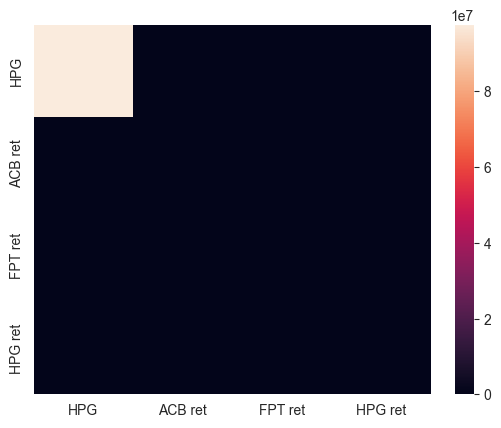

In [6]:
#Graphing the matris covariance
sns.heatmap(cov_matrix)
plt.show()


In [7]:
#Variable
port_return = []
port_volatility = []
port_weight = pd.DataFrame()
risk_free = 0.03


In [8]:
#Tạo danh mục mô phỏng
for i in range(10000):
    w = np.random.random(3)
    w /= np.sum(w)
    port_weight = pd.concat([port_weight, pd.DataFrame(w, columns=['ACB', 'FPT', 'HPG'])], axis=0, ignore_index=True)
    port_return.append(np.sum(w*stock_return.mean())*252)
    port_volatility.append(np.sqrt(np.dot(w.T,np.dot(cov_matrix, w))) * np.sqrt(252))

ValueError: Shape of passed values is (3, 1), indices imply (3, 3)

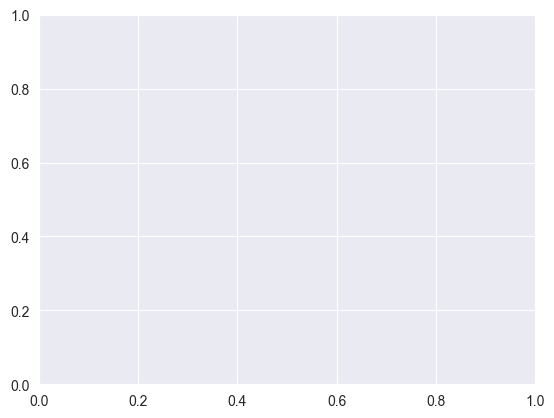

In [9]:
#Trực quan hóa danh mục mô phỏng
fig, ax = plt.subplots()
sns.scatterplot(x= port_volatility, y= port_return, ax=ax)
plt.show()